![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [ ]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.tail(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7,4
2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31,5
2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112,6
2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363,7
2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678,8
2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317,9
2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164,10
2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200,11
2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236,12


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
bikes.groupby('workingday').total.mean()
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [ ]:
# Celda 1.2
bikes.groupby('hour').total.mean()
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

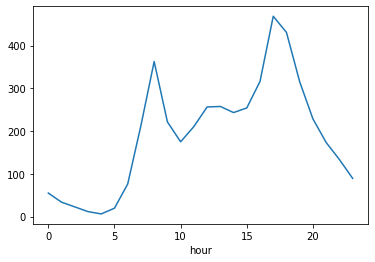

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

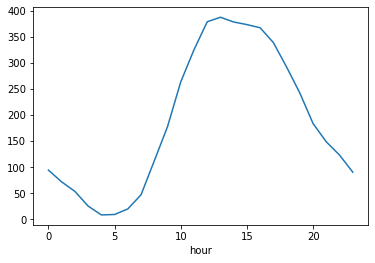

In [ ]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

bikes[bikes['workingday']==0].groupby('hour').total.mean().plot()


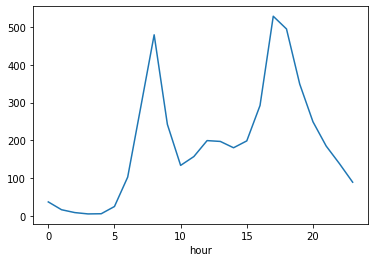

In [ ]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes['workingday']==1].groupby('hour').total.mean().plot()


**Conclusion:**

existe una similitud grande entre la grafica 2.1 y 2.3 como era de esperarse dado que la mayoria de dias son de trabajo, sin embargo a partir de las 8 am el decrecimiento es mas notorio en la grafica 2.3 debido posiblemente al comienzo de la jornada laboral.

------

la grafica 2.2 difiere de la grafica total ya que al no existir los horarios de oficina no existen esas caidas abruptas.




### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [ ]:
# Celda 3

import statsmodels.api as sm


X= bikes[['hour', 'workingday']]
Y= bikes['total']

reg =  LinearRegression()
reg.fit(X,Y)
print(reg)


X = sm.add_constant(X)



model = sm.OLS(Y, X).fit()
predictions = model.predict(X)



print_model = model.summary()
print(print_model)





LinearRegression()
                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:17:08   Log-Likelihood:                -71093.
No. Observations:               10886   AIC:                         1.422e+05
Df Residuals:                   10883   BIC:                         1.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7060      3.866 

**Conclusion:**

podemos analizar los siguientes coeficientes:

la constante tiene un valor de 67.7060 lo cual nos indica que en la hora 0 y en un dia que no es de trabajo =0, se esperan en promedio 67 alquileres.

el coeficiente de hour es 10.4921, con lo cual podemos determinar que por cada hora de aumento se aunmetaran en promedio el alquiler de 10 bicicletas.

y el coefieciente de working day de 4.0725 significa que si es dia laboral aunmentara en promedio 4 alquileres adicionales.

en general la regresion lineal en este caso no es apropiada para la prediccion que se desea obtner por ejemplo vemos que a medida que aumentamos las horas, en la manana las rentas aumentan, pero a partir de un punto comienzan a disminuir entonces la relacion entre la hora y la renta no es lineal, sin embargo si se utilizar otro modelo (no lineal) es de esperar que el r2 aumente considerablemente.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [ ]:

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)



def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_



def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split




def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree







def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [ ]:


X = bikes[['hour','workingday']]
y= bikes['total']


tree =  tree_grow(X,y, level=0, min_gain=0.001, max_depth=11, num_pct=10)
tree

tree_predict(X,tree)



array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

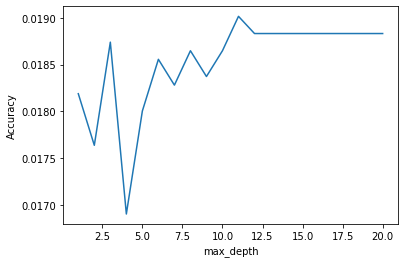

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')


In [ ]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.01901543847566575, 11)

In [ ]:
clf = DecisionTreeClassifier(max_depth=11, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=11, random_state=1)

In [ ]:
feature_cols = ['hour','workingday']
feature_cols


pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
1,workingday,0.235602
0,hour,0.764398


In [ ]:
pred = clf.predict(X)
from sklearn import metrics
metrics.r2_score(y, pred)

0.40104543539286164

[Text(0.4996885025206233, 0.9583333333333334, 'X[26] <= 3140.206\ngini = 0.5\nsamples = 6000\nvalue = [3000, 3000]'),
 Text(0.259158741979835, 0.875, 'X[40] <= 0.605\ngini = 0.464\nsamples = 3047\nvalue = [1931, 1116]'),
 Text(0.15635025206232814, 0.7916666666666666, 'X[25] <= 3573.963\ngini = 0.481\nsamples = 2426\nvalue = [1449, 977]'),
 Text(0.07109303391384052, 0.7083333333333334, 'X[23] <= 290054.172\ngini = 0.431\nsamples = 875\nvalue = [600, 275]'),
 Text(0.0519019248395967, 0.625, 'X[2] <= 1601.5\ngini = 0.456\nsamples = 695\nvalue = [451, 244]'),
 Text(0.039642529789184235, 0.5416666666666666, 'X[41] <= 0.866\ngini = 0.447\nsamples = 670\nvalue = [444, 226]'),
 Text(0.022456461961503207, 0.4583333333333333, 'X[45] <= 0.017\ngini = 0.441\nsamples = 654\nvalue = [439, 215]'),
 Text(0.007332722273143905, 0.375, 'X[52] <= -0.238\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(0.0036663611365719525, 0.2916666666666667, 'X[38] <= 0.025\ngini = 0.278\nsamples = 6\nvalue = [5, 1

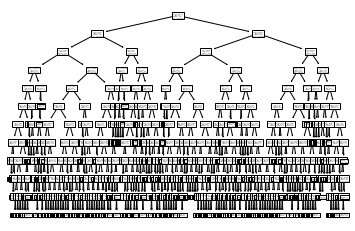

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

**CONCLUSION:**

se escogieron una profundidad del arbol = 11, ya que con esta se obtuvo la maxima precision, una vez creado el arbol al generar la prediccion obtivumos un r2 de 0.40, que comparada con el r2 de la regression lineal es significativamente mayor como era de esperarse.

sin embargo aun no podriamos considerlo un modelo satisfactorio ni sera necesario anadir mas variables explicativas o usar metodos de ensamblaje.



## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

df.dropna()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,http://mashable.com/2013/08/03/twerking-addict...,523.0,10.0,660.0,0.493884,1.0,0.633971,20.0,4.0,1.0,...,0.050000,0.50,-0.258730,-0.80,-0.100000,0.1,0.0,0.4,0.0,0
5996,http://mashable.com/2014/08/21/study-programs-...,139.0,9.0,144.0,0.647887,1.0,0.739583,15.0,4.0,10.0,...,0.100000,0.60,-0.250000,-0.30,-0.200000,0.0,0.0,0.5,0.0,1
5997,http://mashable.com/2013/04/25/email-warrant-m...,623.0,8.0,536.0,0.512287,1.0,0.647929,6.0,2.0,1.0,...,0.100000,0.40,-0.156250,-0.30,-0.100000,0.0,0.0,0.5,0.0,0
5998,http://mashable.com/2013/06/03/smartphone-sale...,584.0,10.0,266.0,0.534413,1.0,0.605882,9.0,6.0,1.0,...,0.100000,0.60,-0.250000,-0.40,-0.100000,0.0,0.0,0.5,0.0,0


In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6
log_reg = sm.Logit(y_train, X_train).fit()

log_reg.summary()


         Current function value: 0.629170
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Popular   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4444
Method:                           MLE   Df Model:                           55
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                 0.09229
Time:                        22:14:48   Log-Likelihood:                -2831.3
converged:                      False   LL-Null:                       -3119.1
Covariance Type:            nonrobust   LLR p-value:                 7.356e-88
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta                         0.0006      0.000      2.609      0.009       0.000       0.001
n_tokens_title                    0.0247      0.016      1.515      0.130      -0.007       0.057
n_tokens_content                  0.0003      0.000      2.254      0.024     3.5e-05       0.001
n_unique_tokens                   0.9185      1.044      0.880      0.379      -1.128       2.965
n_non_stop_words                  1.4459   1.12e+06   1.29e-06      1.000    -2.2e+06     2.2e+06
n_non_stop_unique_tokens          0.0197      0.890      0.022      0.982      -1.725       1.765
num_hrefs                         0.0066      0.003      1.962      0.050    5.44e-06       0.013
num_self_hrefs                   -0.0210      0.009     -2.414      0.016      -0.038      -0.004
num_imgs                          0.0176      0.005      3.445      0.001       0.008       0.028
num_videos                        0.0151      0.009      1.760      0.078      -0.002       0.032
average_token_length             -0.3869      0.133     -2.906      0.004      -0.648      -0.126
num_keywords                      0.0114      0.021      0.549      0.583      -0.029       0.052
data_channel_is_lifestyle        -0.0542      0.205     -0.265      0.791      -0.455       0.347
data_channel_is_entertainment    -0.1325      0.133     -0.993      0.321      -0.394       0.129
data_channel_is_bus              -0.5302      0.208     -2.553      0.011      -0.937      -0.123
data_channel_is_socmed            0.0331      0.195      0.169      0.865      -0.350       0.416
data_channel_is_tech              0.2290      0.195      1.177      0.239      -0.152       0.610
data_channel_is_world             0.0073      0.199      0.037      0.971      -0.382       0.397
kw_min_min                       -0.0006      0.001     -0.693      0.488      -0.002       0.001
kw_max_min                     8.735e-07   4.28e-05      0.020      0.984    -8.3e-05    8.48e-05
kw_avg_min                       -0.0002      0.000     -0.549      0.583      -0.001       0.000
kw_min_max                    -8.434e-07   6.71e-07     -1.256      0.209   -2.16e-06    4.72e-07
kw_max_max                    -2.984e-07   3.21e-07     -0.930      0.353   -9.27e-07    3.31e-07
kw_avg_max                    -6.755e-07   4.67e-07     -1.446      0.148   -1.59e-06     2.4e-07
kw_min_avg                       -0.0001   4.02e-05     -2.573      0.010      -0.000   -2.47e-05
kw_max_avg                    -8.456e-05   1.51e-05     -5.585      0.000      -0.000   -5.49e-05
kw_avg_avg                        0.0008    8.3e-05      9.267      0.000       0.001       0.001
self_reference_min_shares      5.499e-06   4.51e-06      1.219      0.223   -3.34e-06    1.43e-05
self_reference_max_shares      8.172e-07   2.62e-06      0.312      0.755   -4.31e-06    5.94e-06
self_reference_avg_sharess     1.444e-07   5.91e-06      0.024      0.981   -1.14e-05    1.17e-05
weekday

In [ ]:
prediccion_logit= log_reg.predict(X_test)
pl =list(map(round, prediccion_logit))
pl = np.array(pl)

In [ ]:
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

    

In [ ]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

feature_cols = X.columns
feature_cols


pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')



,feature,importance
0,timedelta,0.000000
31,weekday_is_tuesday,0.000000
32,weekday_is_wednesday,0.000000
33,weekday_is_thursday,0.000000
34,weekday_is_friday,0.000000
35,weekday_is_saturday,0.000000
36,weekday_is_sunday,0.000000
37,is_weekend,0.000000
38,LDA_00,0.000000
39,LDA_01,0.000000


In [ ]:
pa = clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


apa = accuracy_score(y_test, pa)

al = accuracy_score(y_test, pl)

f1pa =  f1_score(y_test, pa)

f1al =  f1_score(y_test, pl)



print(apa)

print(al)


print(f1pa)
print(f1al)

0.6453333333333333
0.6426666666666667
0.6448598130841121
0.6323731138545953


**CONCLUSION:**
**texto en negrita**

como podemos observar nuestas estadisticas accuracy y f1 score son ligeramente superiores para el modelo de arboles de decision.

por ejemplo para el arbol de decision y la regresion logistica el 64% de las predicciones que se hicieron fueron acertadas.


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7

# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6439545758183033, 0.6446666666666667)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

aponderado =  accuracy_score(y_pred, y_test)

In [ ]:
aponderado =  accuracy_score(y_pred, y_test)
f1ponderado = f1_score(y_pred,y_test)

print(aponderado)
print(f1ponderado)


0.646
0.6504279131007242


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9
al realizar la votacion ponderada la precision y el F1 score mejoran pero no de manera significativa,  al utilizar el  metodo ponderado se estan teniendo en cuenta, todos los modelos pero es de esperar que la ponderaciones sean muy bajas
en la mayoria de los arboles, de no ser asi hubiera habido una diferencia mayor que al utilizar la votacion mayoritaria.